In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data/user_behavior_dataset.csv')


In [3]:
le = LabelEncoder()

df['Device Model'] = le.fit_transform(df['Device Model'])
df['Operating System'] = le.fit_transform(df['Operating System'])
df['Gender'] = le.fit_transform(df['Gender'])


In [4]:
X = df.drop(columns=['User ID', 'User Behavior Class'])
y = df['User Behavior Class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [8]:
svm_pred = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)

In [9]:
print(f'Accuracy of SVM model: {svm_accuracy * 100:.2f}%')


Accuracy of SVM model: 100.00%


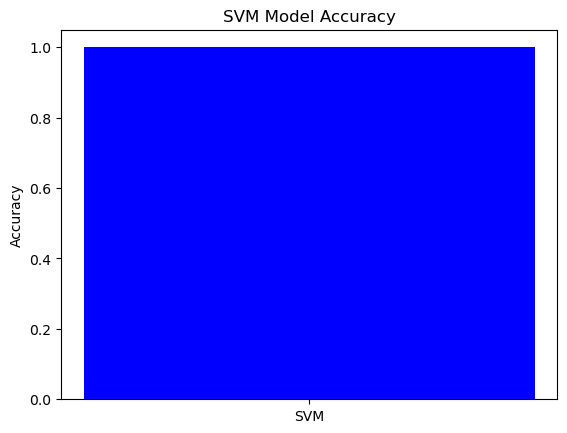

In [10]:
plt.bar(['SVM'], [svm_accuracy], color='blue')
plt.ylabel('Accuracy')
plt.title('SVM Model Accuracy')
plt.show()